In [1]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression



In [2]:
# 2. Đọc file csv và gắng index với giá Close
data = pd.read_csv('../../Dataset/BID-Historical-Data_Group-9.csv', index_col='Date', parse_dates=True)

# Tiền xử lí dữ liệu


In [3]:
# 3. Chuyển các giá trị trong cột về number
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
data["Vol."] = data["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
data["Change %"] = data["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
data['Price'] = data['Price'].apply(convert_str_to_number)
data['Open'] = data['Open'].apply(convert_str_to_number)
data['High'] = data['High'].apply(convert_str_to_number)
data['Low'] = data['Low'].apply(convert_str_to_number)

data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,25141.5,24950.2,25332.9,24950.2,1450000,0.0108
2019-03-04,25715.5,25332.9,25830.3,25256.3,1150000,0.0228
2019-03-05,26480.9,25409.4,27016.6,25409.4,5300000,0.0298
2019-03-06,26595.7,26480.9,26710.5,26327.8,2009999,0.0043
2019-03-07,26710.5,26787.0,26978.3,26557.4,2140000,0.0043
...,...,...,...,...,...,...
2024-05-27,48900.0,49400.0,49400.0,48550.0,763200,-0.0061
2024-05-28,49100.0,49000.0,49200.0,48600.0,1230000,0.0041
2024-05-29,48600.0,49450.0,49450.0,48600.0,1390000,-0.0102


In [4]:
# 4. Loại các giá trị null
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

In [5]:
# 5. Chia train test
df = data
df = df[['Price']]
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size 

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [6]:
# 6. Chạy auto Arima
from pmdarima.arima import auto_arima
model = auto_arima(train_data, start_p=1, start_q=1,
                   max_p=5, max_q=5, m=12,  
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=15251.708, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=14993.701, Time=1.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.70 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=15252.964, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=14900.095, Time=5.70 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=19.03 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.82 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=14898.294, Time=1.65 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=14991.702, Time=0.44 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=12.55 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.95 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=14900.100, Time=3.89 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=22.05 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  919
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -7446.147
Date:                            Thu, 06 Jun 2024   AIC                          14898.294
Time:                                    23:28:53   BIC                          14912.721
Sample:                                         0   HQIC                         14903.804
                                            - 919                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6369      0.015    -42.496      0.000      -0.666      -0.608
ar.S.L24      -0.2960      0.017    -17.350      0.000      -0.329      -0.263
sigma2      7.756e+05    2.6e+04     29.834      0.000    7.25e+05    8.27e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               320.62
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.56
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# 7. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [9]:
# 8. Dự đoán 30 ngày tiếp theo
last_index_30 =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index_30, stop=last_index_30+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index_30+1, last_index_30+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
919    30807.851833
920    30898.630757
921    30775.711264
922    30849.941536
923    30006.261328
924    29822.462828
925    29546.020325
926    28828.499282
927    28485.023890
928    28961.048804
929    29111.249270
930    29314.078470
931    30293.420598
932    30440.348043
933    30305.037900
934    30467.078332
935    29603.942385
936    29438.093002
937    29381.542447
938    28230.053958
939    27919.987073
940    28424.016049
941    28750.340772
942    29305.767076
943    30464.228469
944    30692.981235
945    30523.207327
946    30633.393856
947    30085.096612
948    30001.596046
dtype: float64


In [10]:
# 9. Dự đoán 60 ngày tiếp theo
last_index_60 =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index_60, stop=last_index_60+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index_60+1, last_index_60+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
919    30807.851833
920    30898.630757
921    30775.711264
922    30849.941536
923    30006.261328
924    29822.462828
925    29546.020325
926    28828.499282
927    28485.023890
928    28961.048804
929    29111.249270
930    29314.078470
931    30293.420598
932    30440.348043
933    30305.037900
934    30467.078332
935    29603.942385
936    29438.093002
937    29381.542447
938    28230.053958
939    27919.987073
940    28424.016049
941    28750.340772
942    29305.767076
943    30464.228469
944    30692.981235
945    30523.207327
946    30633.393856
947    30085.096612
948    30001.596046
949    29742.359627
950    28488.521728
951    28508.406069
952    28958.771205
953    29706.594776
954    29951.046777
955    30946.429419
956    31106.442492
957    30962.288050
958    31079.508288
959    30336.435943
960    30195.170360
961    29999.939151
962    28939.758818
963    28739.592906
964    29215.848890
965    29643.063585
966    29981.

In [11]:
# 10. Dự đoán 90 ngày tiếp theo
last_index_90 =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index_90, stop=last_index_90+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index_90+1, last_index_90+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
919     30807.851833
920     30898.630757
921     30775.711264
922     30849.941536
923     30006.261328
            ...     
1004    31913.438152
1005    31762.081418
1006    31884.746249
1007    31187.181884
1008    31061.342771
Length: 90, dtype: float64


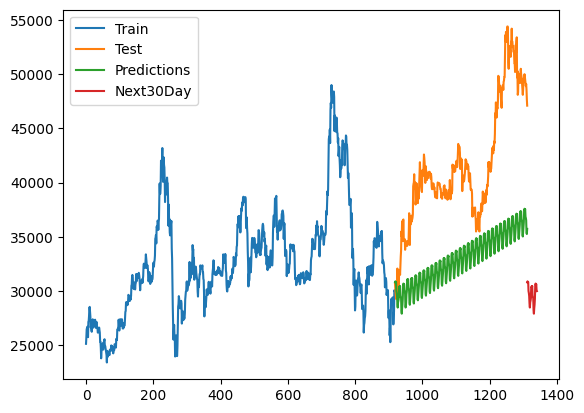

In [12]:
#11. Vẽ đồ thị các giá trị từ train tới test và dự đoán 30 ngày sau
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

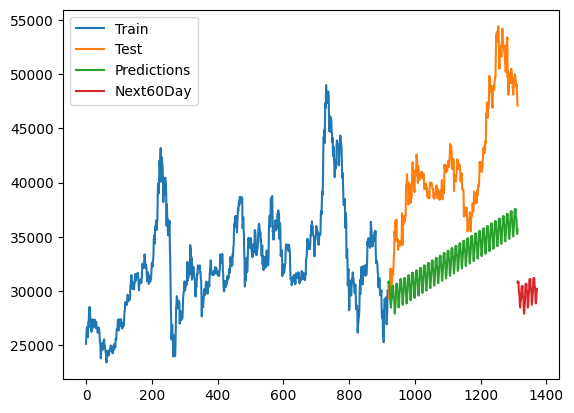

In [13]:
#12. Vẽ đồ thị các giá trị từ train tới test và dự đoán 60 ngày sau

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

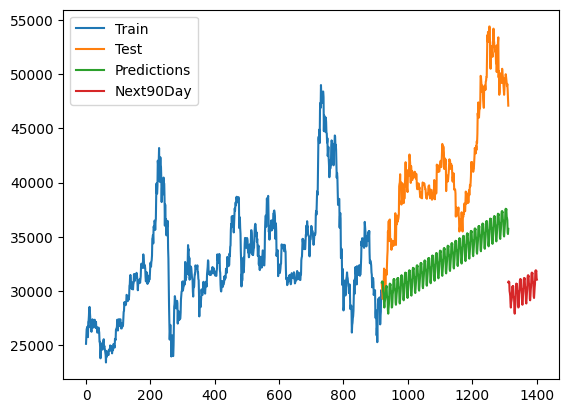

In [14]:
#12. Vẽ đồ thị các giá trị từ train tới test và dự đoán 90 ngày sau
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

In [15]:
#13. Đánh giá mô hình

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Tính toán RMSE, MAPE và MAE cho tập test
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 9563.747705289714
Testing MAPE: 19.884705542604824
Testing MAE: 8620.590659033292
